In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None,names=["target","ids","date","flag","user","text"])
df.head()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
def text_cleaning(text):
  text = re.sub(r"http\S+","",text)
  text = re.sub(r"@\w+","",text)
  text = re.sub(r"#","",text)
  text = re.sub(r"[^A-Za-z0-9\s]","",text)
  text = text.lower()
  return text
df['clean_text'] = df['text'].apply(text_cleaning)
df[['text','clean_text']].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [5]:
df.rename(columns={df.columns[0]: 'sentiment'}, inplace=True)

label_map = {0: "Negative", 2: "Neutral", 4: "Positive"}
df['sentiments'] = df['sentiment'].map(label_map)

print(df['sentiments'].value_counts())

num_label = {"Negative": -1, "Neutral": 0, "Positive": 1}
df['sentiment_label'] = df['sentiments'].map(num_label)

print(df['sentiment_label'].value_counts())


sentiments
Negative    800000
Positive    800000
Name: count, dtype: int64
sentiment_label
-1    800000
 1    800000
Name: count, dtype: int64


In [8]:
tf_idf =  TfidfVectorizer(max_features=5000)
X = tf_idf.fit_transform(df['clean_text'])
y = df['sentiments']

Accuracy: 0.790509375


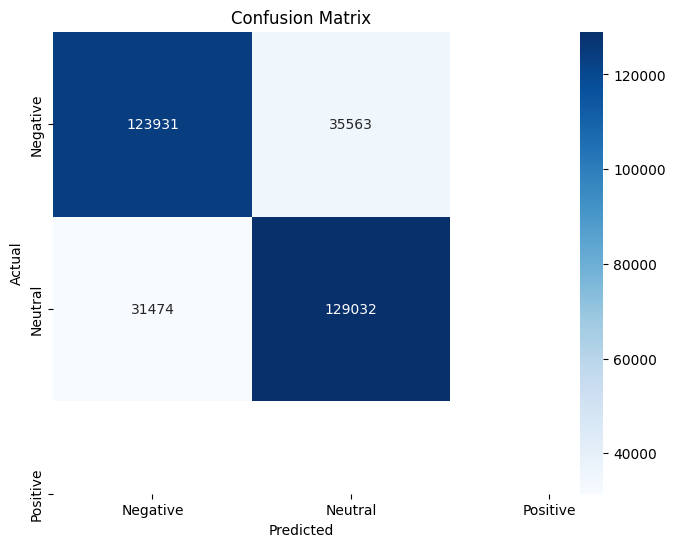

              precision    recall  f1-score   support

    Negative       0.80      0.78      0.79    159494
    Positive       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Negative","Neutral","Positive"],yticklabels=["Negative","Neutral","Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,y_pred))

Q)Why did i choose Logistic Regression?

I chose logistic regression because it is simple and efficient for high - dimensional text data like tweets and performs well with TF-IDF and scaled well with large datasets

Q)How TF-IDF helped capture important features??

TF-IDF helped convert tweet text into numerical vectors by assigning higher weights to words that are important in a specific tweet but rare across the entire dataset.



*   Challenges faced





The main challenge i faced while working on the challenge was loading the dataset because of the size of the csv file and other challenge was removing the special characters from the tweets.